In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load MNIST dataset

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize and reshape input images

In [3]:
X_train = X_train / 255.0                                # Normalize pixel values
X_test = X_test / 255.0
X_train = X_train[..., tf.newaxis]                       # Add channel dimension: (28, 28, 1)
X_test = X_test[..., tf.newaxis]

# Define CNN model

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),  # 32 filters, 3x3 kernel
    tf.keras.layers.MaxPooling2D(2, 2),                                             # Reduce spatial size
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),                           # Deeper feature extraction
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),                                                     # Flatten before Dense layer
    tf.keras.layers.Dense(64, activation='relu'),                                  # Hidden dense layer
    tf.keras.layers.Dense(10, activation='softmax')                                # Output layer (10 classes)
])

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile model

In [5]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the CNN

In [6]:
model.fit(X_train, y_train, epochs=5, validation_split=0.1, verbose=1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9007 - loss: 0.3407 - val_accuracy: 0.9853 - val_loss: 0.0519
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9843 - loss: 0.0500 - val_accuracy: 0.9875 - val_loss: 0.0404
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9903 - loss: 0.0329 - val_accuracy: 0.9893 - val_loss: 0.0377
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9923 - loss: 0.0230 - val_accuracy: 0.9897 - val_loss: 0.0352
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9941 - loss: 0.0175 - val_accuracy: 0.9907 - val_loss: 0.0365


# Evaluate on test data

In [7]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.2f}")

Test Accuracy: 0.99


# Visualize predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


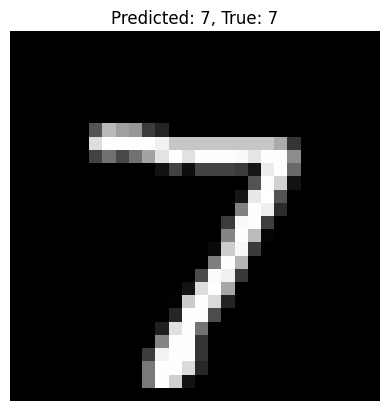

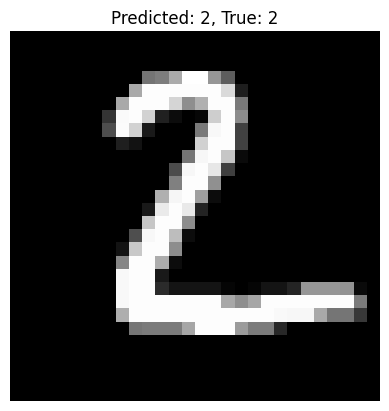

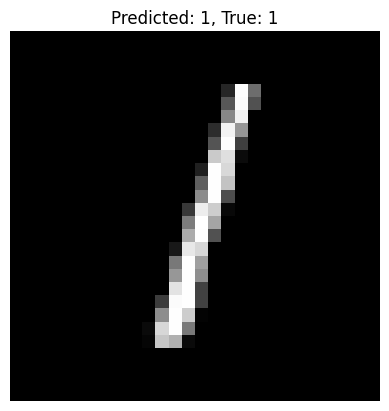

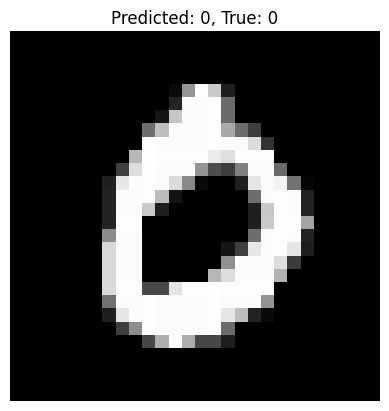

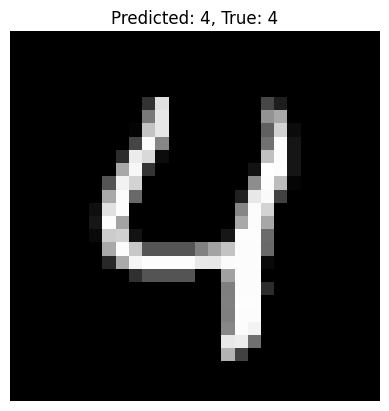

In [9]:
preds = model.predict(X_test[:5])
for i, pred in enumerate(preds):
    plt.imshow(X_test[i].squeeze(), cmap='gray')
    plt.title(f"Predicted: {tf.argmax(pred).numpy()}, True: {y_test[i]}")
    plt.axis('off')
    plt.show()